# 헬스 갤러리 데이터 크롤링

* 굉장히 악랄한 게시판 이용자와 비속어가 많지만, 잘찾아보면 유익한 헬스 관련정보로 가득한 사이트이긴하다. 그래서, 키워드에 맞게 필터링한 후에, 해당 키워드와 가장 유사도가 높은 단어에 따라 해당 제품, 운동법이 괜찮은지 확인하는 의도로 프로젝트를 계획하였다. ( 이곳만큼 헬스에 미친 사람들이 있는 곳이 없긴하다. )

In [ ]:
!pip install bs4 # 파이썬 크롤링 크롤러 설치
!pip install lxml # Beautiful Soup 파싱 도구를 더 잘 활용하기 위한 것

In [ ]:
import requests
from urllib import request
from bs4 import BeautifulSoup
import time
import pandas as pd


In [ ]:
# 헬스 갤러리 검색어 base_URL
BASE_URL = "https://gall.dcinside.com/board/lists?id=extra&s_type=search_subject_memo&s_keyword="
KEYWORD_URL="프로틴"
URL=BASE_URL+KEYWORD_URL
print(URL)

https://gall.dcinside.com/board/lists?id=extra&s_type=search_subject_memo&s_keyword=프로틴


In [ ]:
# headers가 배열변수 인 이유는, 자신의 request로 보낸 User-Agent 뿐만 아니라, 여러 개조한 User-Agent도 사용하여 여러번의 request로 인한 사이트의 차단을 최대한 회피하기 위함이다.
headers=[
         {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36'},
]
# https://paulaner80.tistory.com/entry/%ED%81%AC%EB%A1%AC%EC%97%90%EC%84%9C-request-response-header-%ED%99%95%EC%9D%B8%ED%95%98%EA%B8%B0



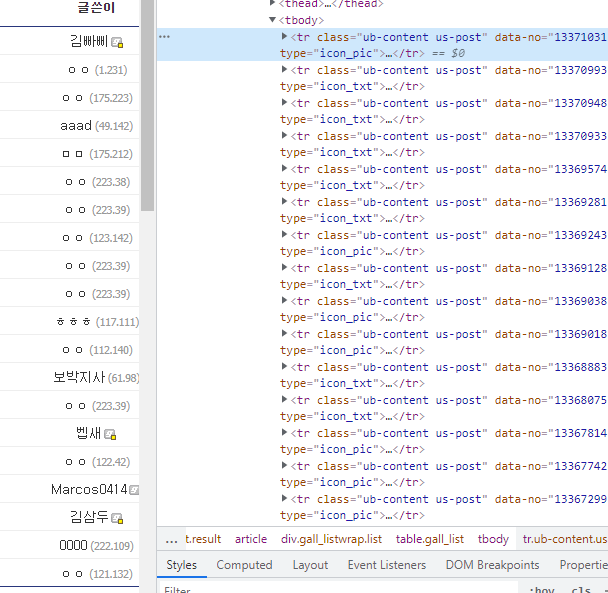

In [ ]:
response=requests.get(URL,headers=headers[0])

In [ ]:
post_limit=1000 # 게시글 몇개 가져올지 정함
gallery_data=pd.DataFrame(columns=['post'])

In [ ]:
# 게시글 여러개를 가져오기위해 URL 재정의
BASE_URL = "https://gall.dcinside.com/board/lists"
ARTICLE_BASE_URL="https://gall.dcinside.com"
KEYWORD="신타"
search_pos=-13312539
# 헬스 갤러리 검색어 base_URL
while len(gallery_data)<=post_limit:
  search_pos+=1
  for i in range(1,4):
    params={'id':'extra','page':i,'search_pos':search_pos,'s_type':'search_subject_memo','s_keyword':KEYWORD}
    
    response=requests.get(BASE_URL,params,headers=headers[0])
    
    soup=BeautifulSoup(response.content,'html.parser')

    # 실질적 글 목록 부분
    article_list=soup.find('tbody').find_all('tr')

    for tr_item in article_list:
        title_tag=tr_item.find('a',href=True)
        title=title_tag.text

        print('제목 :',title)
        print('주소 :',title_tag['href'])
        article_response=requests.get(ARTICLE_BASE_URL+title_tag['href'],headers=headers[0])
        print('url : ',article_response.url)
        article_id=(title_tag['href'].split('no=')[1]).split('&')[0]
        print('게시물 Number : ',article_id)

        article_soup=BeautifulSoup(article_response.content,'html.parser')

        article_post=[]
        article_contents=article_soup.find('div',class_='write_div').find_all('div')
        for article_div in article_contents:
          if article_div.text not in article_post:
            article_post.append(article_div.text)
        post=' '.join(article_post)
        print('내용 ',post)
        new_data={'post':post}
        gallery_data=gallery_data.append(new_data,ignore_index=True)
        
      

제목 : 운동후 프로틴 먹고 안먹고 차이큼?
주소 : /board/view/?id=extra&no=13371280&search_pos=-13312538&s_type=search_subject_memo&s_keyword=%ED%94%84%EB%A1%9C%ED%8B%B4&page=1
url :  https://gall.dcinside.com/board/view/?id=extra&no=13371280&search_pos=-13312538&s_type=search_subject_memo&s_keyword=%ED%94%84%EB%A1%9C%ED%8B%B4&page=1
게시물 Number :  13371280
내용  ㅇㅇ
제목 : 헬창형들 프로틴값벌어라
주소 : /board/view/?id=extra&no=13371253&search_pos=-13312538&s_type=search_subject_memo&s_keyword=%ED%94%84%EB%A1%9C%ED%8B%B4&page=1
url :  https://gall.dcinside.com/board/view/?id=extra&no=13371253&search_pos=-13312538&s_type=search_subject_memo&s_keyword=%ED%94%84%EB%A1%9C%ED%8B%B4&page=1
게시물 Number :  13371253
내용  틱톡 추천인 2만원에 산다 4번만 더하면 120번다 무야호
제목 : 디저트39 프로틴쉐이크시도 때도 없이사먹고 2키로 찜
주소 : /board/view/?id=extra&no=13371031&search_pos=-13312538&s_type=search_subject_memo&s_keyword=%ED%94%84%EB%A1%9C%ED%8B%B4&page=1
url :  https://gall.dcinside.com/board/view/?id=extra&no=13371031&search_pos=-13312538&s_type=search_subject_memo&s_ke

In [ ]:
gallery_data.head(30)

,post
0,ㅇㅇ
1,틱톡 추천인 2만원에 산다 4번만 더하면 120번다 무야호
2,어쩐지 마싯더라 - dc official App
3,우유없어서 사이다에 타먹었는데 초코사이다 맛나고 좋네 - dc official App
4,?
5,
6,
7,오늘도 근육조지자잉 - dc official App
8,컴뱃 초콜릿만 먹어왔는데마프 한번 도전해보려고
9,


In [ ]:
gallery_data.to_csv('hellene.csv',mode="w") # 헬린이 데이터 저장.

In [ ]:
df=gallery_data

# 데이터 전처리

In [ ]:
# Initial Setting (font, display)
!sudo apt-get install -y fonts-nanum # 글씨체 다운로드
!sudo fc-cache -fv # 폰트 리스트 갱신
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')

import matplotlib
get_ipython().run_line_magic('config',"InlineBackend.figure_format='retina'") # 화질보정

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,629 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 4.9 MB/s 
     |████████████████████████████████| 448 kB 49.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
df.head(10)

,post
0,ㅇㅇ
1,틱톡 추천인 2만원에 산다 4번만 더하면 120번다 무야호
2,어쩐지 마싯더라 - dc official App
3,우유없어서 사이다에 타먹었는데 초코사이다 맛나고 좋네 - dc official App
4,?
5,
6,
7,오늘도 근육조지자잉 - dc official App
8,컴뱃 초콜릿만 먹어왔는데마프 한번 도전해보려고
9,


In [ ]:
df['content']=df['post'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 한글 제외 불순어 제거

In [ ]:
df.head(5)

,post,content
0,ㅇㅇ,ㅇㅇ
1,틱톡 추천인 2만원에 산다 4번만 더하면 120번다 무야호,틱톡 추천인 만원에 산다 번만 더하면 번다 무야호
2,어쩐지 마싯더라 - dc official App,어쩐지 마싯더라
3,우유없어서 사이다에 타먹었는데 초코사이다 맛나고 좋네 - dc official App,우유없어서 사이다에 타먹었는데 초코사이다 맛나고 좋네
4,?,


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.replace("",float("NaN"),inplace=True) # 빈 값(empty) 확인, 모든 빈 값을 Null 값으로 변환하고 Null 값이 있는지 확인
df.isnull().values.any()

True

In [ ]:
df.dropna(inplace=True)

In [ ]:
print('총 샘플 수 : ',len(df))

총 샘플 수 :  378


In [ ]:
df.head(10)

,post,content
0,ㅇㅇ,ㅇㅇ
1,틱톡 추천인 2만원에 산다 4번만 더하면 120번다 무야호,틱톡 추천인 만원에 산다 번만 더하면 번다 무야호
2,어쩐지 마싯더라 - dc official App,어쩐지 마싯더라
3,우유없어서 사이다에 타먹었는데 초코사이다 맛나고 좋네 - dc official App,우유없어서 사이다에 타먹었는데 초코사이다 맛나고 좋네
7,오늘도 근육조지자잉 - dc official App,오늘도 근육조지자잉
8,컴뱃 초콜릿만 먹어왔는데마프 한번 도전해보려고,컴뱃 초콜릿만 먹어왔는데마프 한번 도전해보려고
10,시바 컴뱃 2스쿱 한 방에 몰아먹었는데이러면 안 되겠노,시바 컴뱃 스쿱 한 방에 몰아먹었는데이러면 안 되겠노
11,하루에ㅔ,하루에ㅔ
12,하루 한끼 라면 두개 개꿀 ㅋ나머지 프로틴 ㅋ,하루 한끼 라면 두개 개꿀 ㅋ나머지 프로틴 ㅋ
13,우리나라 회사는 뭐가 있음?,우리나라 회사는 뭐가 있음


In [ ]:
# 길이가 10이하인 내용은 drop
# drop_train=[index for index,sentence in enumerate(content) if len(sentence)]
# 

In [ ]:
# 불용어 설정

stopwords=['않다','에서','있다','없다','그렇다','아니다','것','이다','의','가','이','은','들', '주',
             '는','좀','잘','걍','과','도','을','를','으로','자','에','와','한','하다','휴','수' ,'일']

In [ ]:
# konlpy로 명사만 추출하는 토큰화
okt=Okt()
token=[]
for sentence in df['content']:
  temp=[]
  temp=okt.nouns(sentence)
  temp=[word for word in temp if not word in stopwords] # 불용어 제거
  token.append(temp)
df['token']=token

In [ ]:
tokenizer=Tokenizer() # tensorflow.keras.preprocessing.text https://codetorial.net/tensorflow/natural_language_processing_in_tensorflow_01.html
tokenizer.fit_on_texts(token)

word2idx=tokenizer.word_index
idx2word={v:k for k,v in word2idx.items()}
encoded=tokenizer.texts_to_sequences(token)

In [ ]:
word2idx

{'가격': 56,
 '가성': 154,
 '가슴': 101,
 '강도': 18,
 '개': 11,
 '개꿀': 142,
 '개선': 87,
 '거': 8,
 '거임': 212,
 '거지': 80,
 '건강': 78,
 '건아': 177,
 '걸': 238,
 '견과': 190,
 '계란': 106,
 '계속': 197,
 '고': 178,
 '골격근': 29,
 '공구': 69,
 '과일': 192,
 '구매': 231,
 '국산': 221,
 '군대': 117,
 '군살': 195,
 '군인': 200,
 '그냥': 173,
 '그램': 50,
 '기대': 165,
 '김밥': 105,
 '김종국': 224,
 '껀데': 222,
 '끼': 65,
 '나': 26,
 '나머지': 143,
 '나은정': 179,
 '난': 169,
 '내': 71,
 '네': 160,
 '눌': 92,
 '늘': 111,
 '다가': 227,
 '다이어트': 214,
 '다해': 229,
 '단백질': 47,
 '달': 49,
 '닭': 4,
 '더': 95,
 '데': 44,
 '도전': 138,
 '돈': 9,
 '동안': 110,
 '디': 152,
 '때': 103,
 '라면': 141,
 '레이': 211,
 '려': 82,
 '리': 6,
 '마이': 55,
 '마프': 63,
 '막': 176,
 '만삼': 164,
 '만원': 19,
 '말': 70,
 '말좀': 88,
 '맛': 39,
 '머': 153,
 '머그': 161,
 '머핀': 157,
 '먹기': 232,
 '먹음': 96,
 '멸치': 124,
 '모델': 225,
 '몸무게': 20,
 '무': 59,
 '무가당': 168,
 '무료': 120,
 '무릎': 66,
 '무엇': 245,
 '물': 27,
 '뭐': 41,
 '뭔가': 223,
 '미트': 7,
 '민증': 76,
 '민초': 83,
 '및': 186,
 '바나나': 93,
 '바이': 207,
 '반찬': 202,
 '밥':

In [ ]:
print(encoded[:2])

[[], [128, 57, 19, 129, 130, 58, 59, 131]]


In [ ]:
vocab_size=len(word2idx)+1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 247


# 네거티브 샘플링을 통한 데이터셋 구성하기

In [ ]:
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/skipgrams
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링
skip_grams=[skipgrams(sample,vocabulary_size=vocab_size,window_size=10) for sample in encoded[:]] # window_size 변경필요

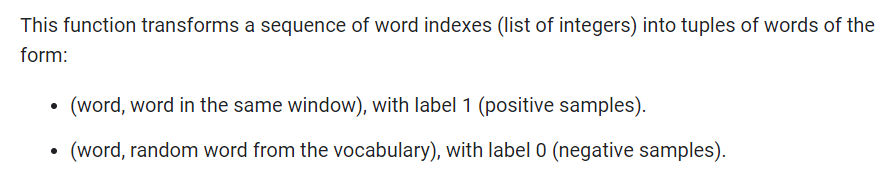

In [ ]:
skip_grams

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs,labels=skip_grams[1][0], skip_grams[1][1]


In [ ]:
pairs

[[129, 234],
 [131, 58],
 [57, 203],
 [131, 128],
 [130, 81],
 [130, 58],
 [57, 19],
 [129, 141],
 [131, 19],
 [128, 59],
 [59, 231],
 [57, 215],
 [131, 126],
 [130, 70],
 [58, 130],
 [128, 129],
 [59, 79],
 [58, 59],
 [131, 129],
 [130, 131],
 [129, 19],
 [19, 7],
 [130, 19],
 [58, 129],
 [59, 57],
 [128, 47],
 [59, 58],
 [128, 57],
 [58, 84],
 [58, 128],
 [58, 80],
 [19, 58],
 [130, 217],
 [19, 57],
 [128, 162],
 [19, 128],
 [130, 57],
 [131, 212],
 [57, 129],
 [131, 130],
 [58, 209],
 [59, 130],
 [57, 59],
 [57, 128],
 [57, 58],
 [19, 21],
 [59, 165],
 [131, 231],
 [58, 131],
 [58, 19],
 [57, 150],
 [129, 57],
 [57, 131],
 [128, 19],
 [130, 232],
 [58, 57],
 [130, 59],
 [58, 215],
 [131, 57],
 [19, 213],
 [128, 149],
 [19, 130],
 [131, 85],
 [19, 2],
 [130, 129],
 [19, 73],
 [58, 107],
 [130, 3],
 [129, 128],
 [130, 11],
 [19, 126],
 [128, 68],
 [129, 131],
 [128, 222],
 [59, 129],
 [129, 134],
 [57, 72],
 [57, 18],
 [19, 107],
 [58, 220],
 [57, 130],
 [59, 19],
 [128, 57],
 [128, 1

In [ ]:
labels

[0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1]

In [ ]:
for i in range(4):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))
    
# 윈도우 크기 내에서 중심 단어, 주변 단어의 관계를 가지는 경우에는 1의 레이블을 갖도록하고, 그렇지 않은 경우는 0의 레이블을 가지도록하여 데이터셋을 구성한다.

(산다 (129), 슬슬 (234)) -> 0
(야호 (131), 번 (58)) -> 1
(추천 (57), 저녁 (203)) -> 0
(야호 (131), 틱톡 (128)) -> 1


In [ ]:
print(len(pairs))
print(len(labels))

112
112


# 5. Skip-Gram with Negative Sampling (SGNS) 구현

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [ ]:
embed_size=100

In [ ]:
# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embed_size)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embed_size)(c_inputs)

In [ ]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 100)       24700       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 100)       24700       input_2[0][0]                    
______________________________________________________________________________________________

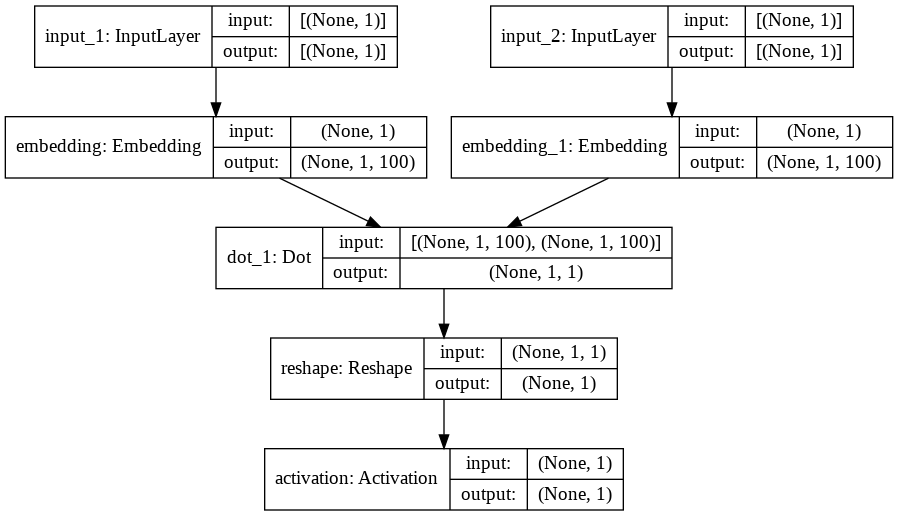

In [ ]:
model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

In [ ]:
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  
    print('Epoch :',epoch, 'Loss :',loss)

IndexError: ignored

# Word2Vec 이용

In [ ]:
from gensim.models import Word2Vec
model=Word2Vec(sentences=token,size=100,window=5,min_count=5,workers=4,sg=0)

In [ ]:
print(model.wv.most_similar("운동"))
print(model.wv.most_similar("프로"))

[('개', 0.9997757077217102), ('프로', 0.9997476935386658), ('거', 0.9997458457946777), ('틴', 0.9997186064720154), ('햇반', 0.9997056722640991), ('닭', 0.9996394515037537), ('하루', 0.9996128082275391), ('강도', 0.9996076226234436), ('하나', 0.9995955228805542), ('그램', 0.9995815753936768)]
[('틴', 0.9997963309288025), ('개', 0.9997693300247192), ('운동', 0.9997476935386658), ('거', 0.999723494052887), ('그램', 0.9996316432952881), ('하루', 0.9996078014373779), ('닭', 0.9995625019073486), ('하나', 0.9995574951171875), ('햇반', 0.9995568990707397), ('정도', 0.9995557069778442)]


In [ ]:
word_vectors

In [ ]:
vocabs=word_vectors.vocab.keys()

In [ ]:
word_vectors_list = [word_vectors[v] for v in vocabs]

In [ ]:
word_vectors_list

[array([ 0.02514415, -0.05744183, -0.02151923,  0.0089361 ,  0.01918702,
        -0.01143646, -0.01277349,  0.01439357,  0.03340219,  0.0094464 ,
         0.01986584, -0.03576349, -0.03981114,  0.00981641, -0.02016725,
        -0.0251029 , -0.00846531,  0.02625403,  0.00473283,  0.01967809,
         0.00272622,  0.02223469, -0.02753063,  0.00044792,  0.02371978,
        -0.00543515, -0.08826873, -0.01673557,  0.03594806, -0.00605576,
        -0.019885  , -0.00327709,  0.02774315,  0.02449185, -0.04152428,
         0.02302106,  0.00624831,  0.01527334,  0.01007582, -0.00126006,
        -0.02233431, -0.00669905,  0.00616503,  0.01354006,  0.02155709,
         0.01157481, -0.01539386,  0.01693369, -0.02549442, -0.04935048,
         0.00278217,  0.02887186, -0.02051239, -0.03756389, -0.00363781,
        -0.03279907,  0.05132712, -0.00530101, -0.00473363, -0.02197083,
        -0.02574917, -0.06498337, -0.04508953, -0.03901999,  0.06255484,
        -0.06476823, -0.01014833, -0.07749745,  0.0

In [ ]:
# 단어벡터를 구한다.
word_vectors = model.wv
 
vocabs= word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]
 
# 결과1 : 단어간 유사도를 확인
print(word_vectors.similarity(w1='프로', w2='틴'))



0.99979633


In [ ]:
import matplotlib.pyplot as plt
 
# 단어와 2차원 X축의 값, Y축의 값을 입력받아 2차원 그래프를 그린다
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8 ,6))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

# TSNE 생성

In [ ]:
# Initial Setting (font, display)
!sudo apt-get install -y fonts-nanum # 글씨체 다운로드
!sudo fc-cache -fv # 폰트 리스트 갱신
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')

import matplotlib
get_ipython().run_line_magic('config',"InlineBackend.figure_format='retina'") # 화질보정

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt 
import pandas as pd 
from gensim.models import KeyedVectors

from matplotlib import font_manager, rc
import platform


# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처 
mpl.rcParams['axes.unicode_minus'] = False


def show_tsne(): 
  tsne = TSNE(n_components=2) 
  X = tsne.fit_transform(X_show) 
  df = pd.DataFrame(X, index=vocab_show, columns=['x', 'y']) 
  fig = plt.figure() 
  fig.set_size_inches(30, 20) 
  ax = fig.add_subplot(1, 1, 1) 
  ax.scatter(df['x'], df['y']) 
  for word, pos in df.iterrows():
     ax.annotate(word, pos, fontsize=10) 
  plt.xlabel("t-SNE 특성 0") 
  plt.ylabel("t-SNE 특성 1") 
  plt.show()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54001 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from curren

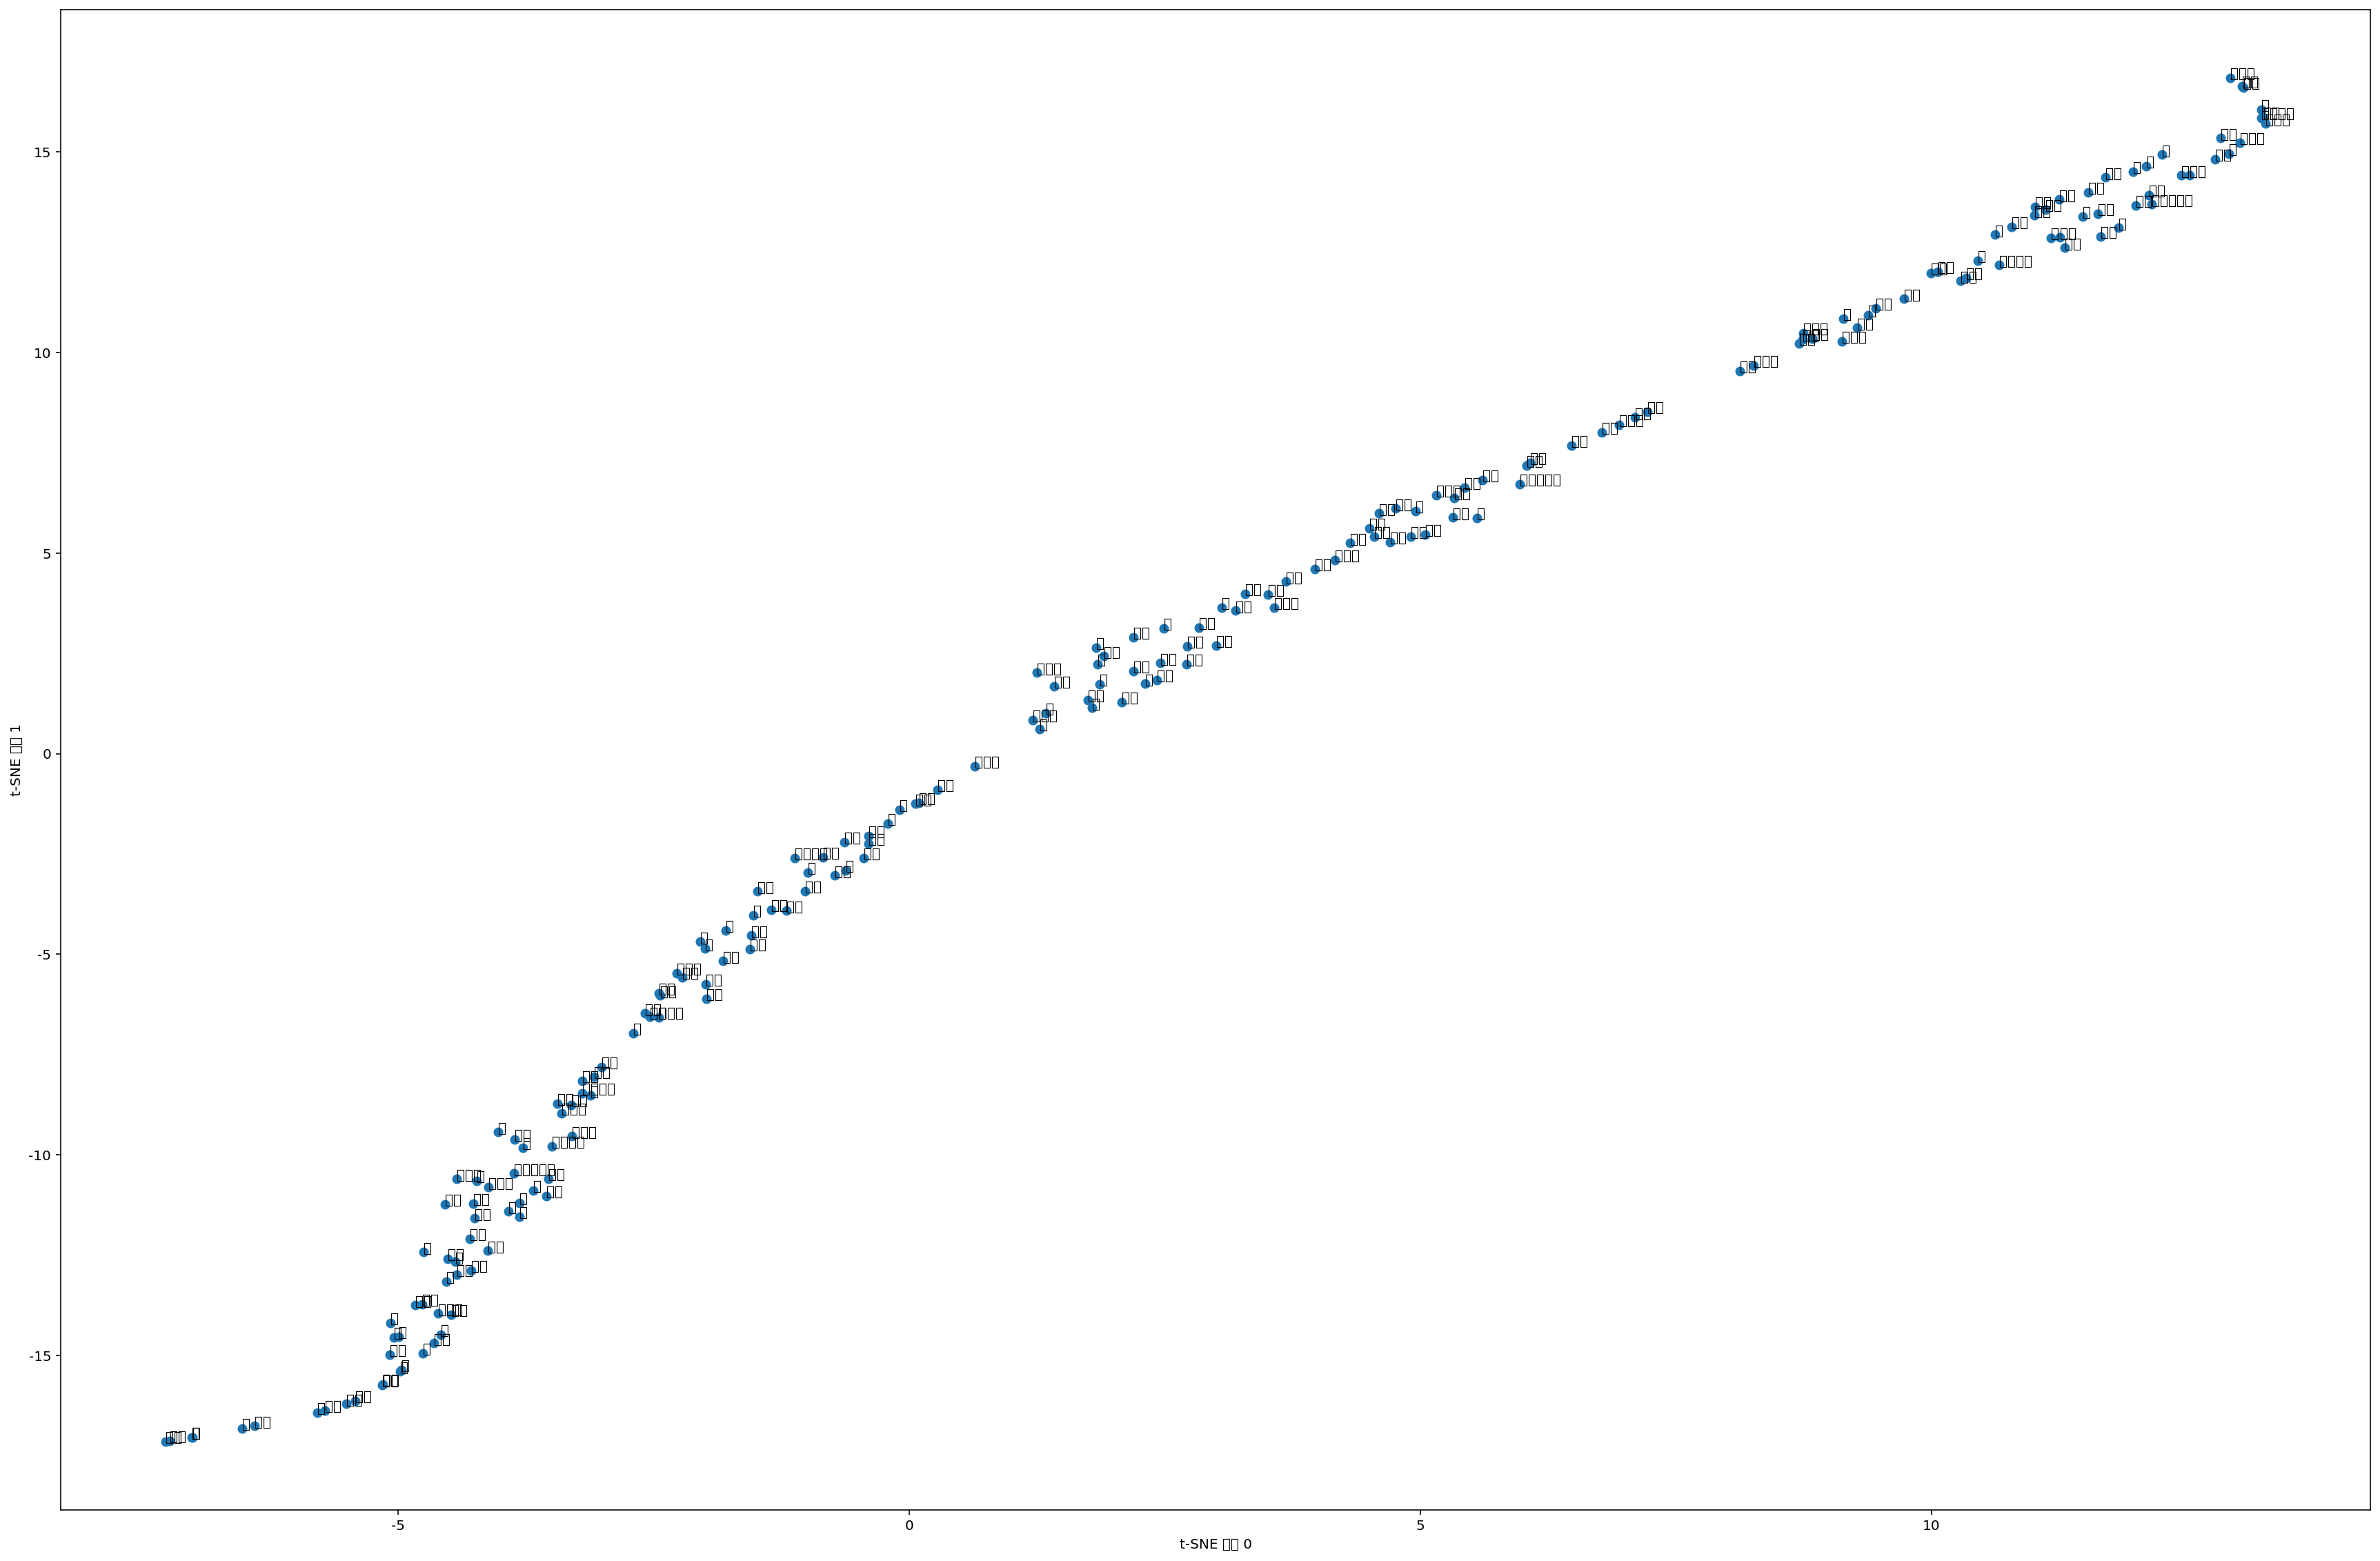

In [ ]:
vocab = list(model.wv.vocab) 
X = model[vocab] 

# sz개의 단어에 대해서만 시각화
sz = 200 
X_show = X[:sz,:] 
vocab_show = vocab[:sz]

show_tsne()

# Word Cloud  생성

In [ ]:
from collections import Counter

def tokenizing(df):
  words=np.hstack(df['token'].values)
  word_count=Counter(words)
  input=dict(word_count.most_common(300))
  return input

In [ ]:
from wordcloud import WordCloud

# 토크나이징된 data frame 넣으면 워드클라우드 그려주는 함수 정의
def wcdraw(df, color):  
  df2 = tokenizing(df)
  fontpath = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
  wordcloud = WordCloud(font_path = fontpath, max_words=100, colormap = color,
                      width=900,height=500, background_color ='white')
  wordcloud = wordcloud.generate_from_frequencies(df2) #빈도에 따라서 
  plt.figure(figsize = (15 , 10))
  plt.axis("off")
  plt.imshow(wordcloud)

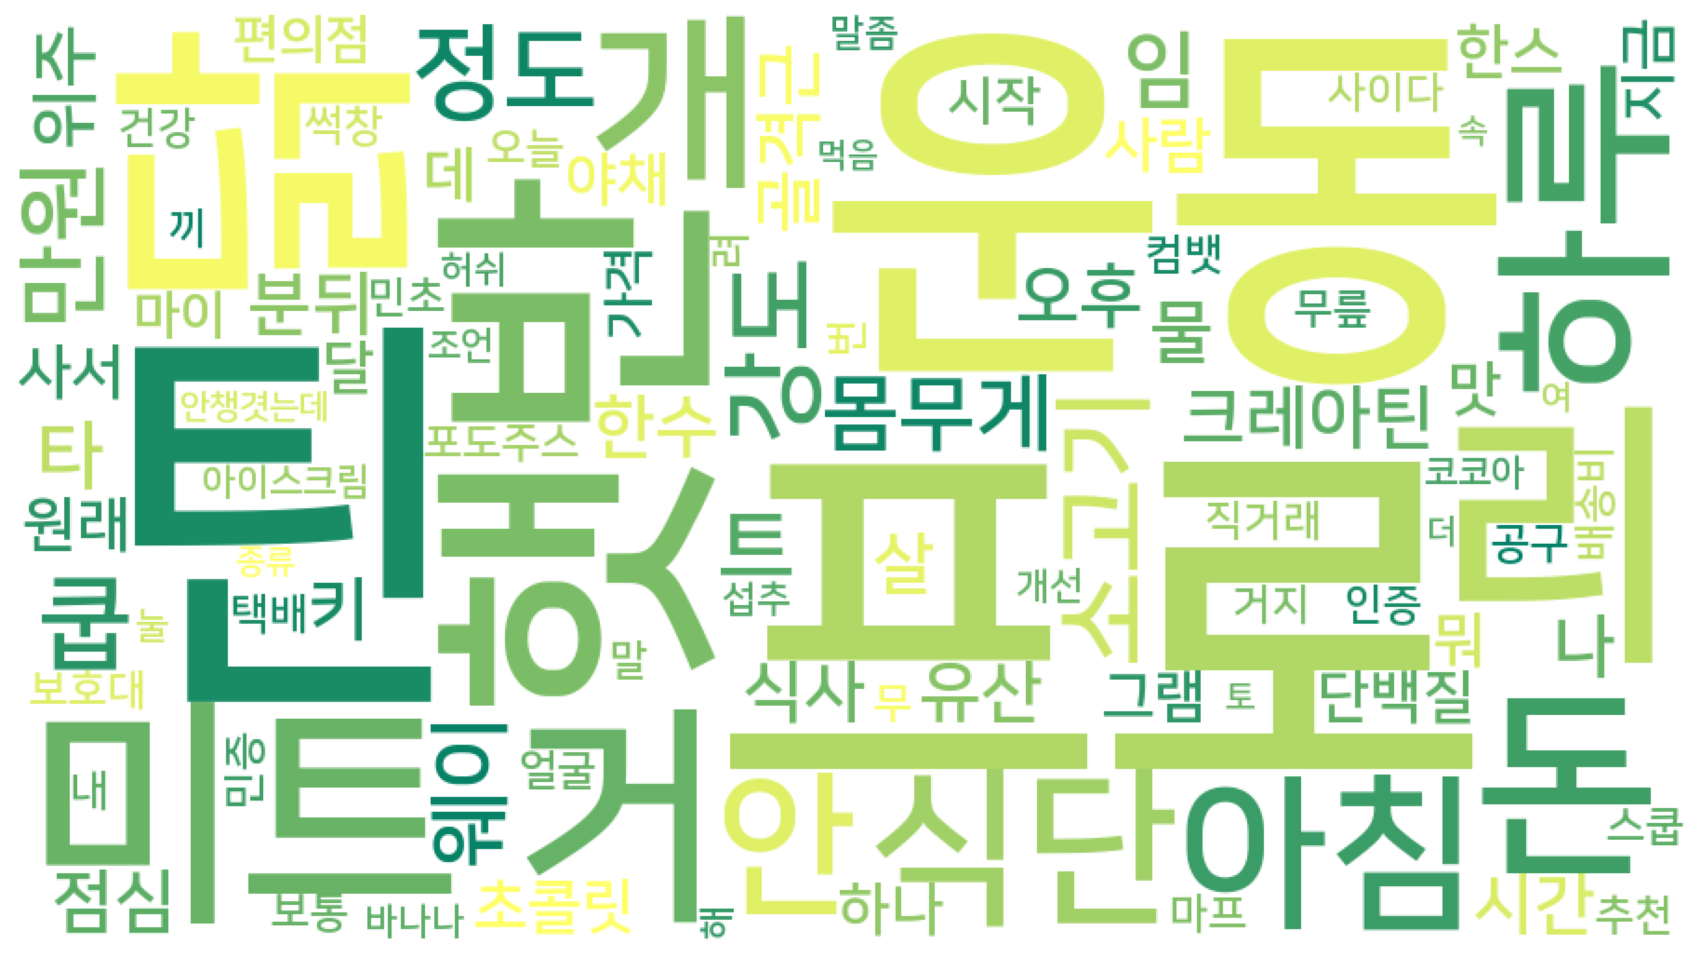

In [ ]:
wcdraw(df,'summer')